<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#loading dataset
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome

In [14]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

Split: 0.05  Depth: 13  Nodes: 253  Train set accuracy: 1.0  Test set Accuracy: 0.6923076923076923
     Depth: 13  Nodes: 253
     Confusion Matrix: [array([0.56410256, 0.1025641 ]), array([0.20512821, 0.12820513])]
Split: 0.1  Depth: 15  Nodes: 243  Train set accuracy: 1.0  Test set Accuracy: 0.6883116883116883
     Depth: 15  Nodes: 243
     Confusion Matrix: [array([0.45454545, 0.16883117]), array([0.14285714, 0.23376623])]
Split: 0.15  Depth: 13  Nodes: 219  Train set accuracy: 1.0  Test set Accuracy: 0.6724137931034483
     Depth: 13  Nodes: 219
     Confusion Matrix: [array([0.47413793, 0.17241379]), array([0.15517241, 0.19827586])]
Split: 0.2  Depth: 14  Nodes: 219  Train set accuracy: 1.0  Test set Accuracy: 0.6883116883116883
     Depth: 14  Nodes: 219
     Confusion Matrix: [array([0.48701299, 0.15584416]), array([0.15584416, 0.2012987 ])]
Split: 0.3  Depth: 16  Nodes: 193  Train set accuracy: 1.0  Test set Accuracy: 0.7186147186147186
     Depth: 16  Nodes: 193
     Confusio

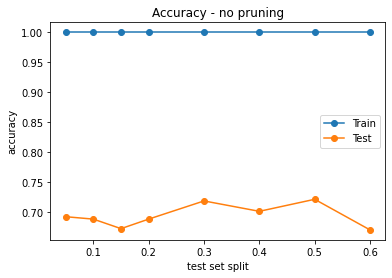

In [34]:
#decision tree classifer vs splits for no pruning
train_acc = []
test_acc = []
splits = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]
treenodes = []
treedepth = []

for i in range(len(splits)):
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=splits[i], random_state=1)
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini')

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print("Split:", splits[i], " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:", train_acc[i], " Test set Accuracy:",test_acc[i])

   #printConfusion matrix
   print("     Confusion Matrix:", list(confusion_matrix(y_test,y_test_pred)/len(y_test)))

#plot results
pyplot.plot(splits, train_acc , '-o', label='Train')
pyplot.plot(splits, test_acc, '-o', label='Test')
pyplot.title('Accuracy - no pruning')
pyplot.ylabel('accuracy')
pyplot.xlabel('test set split')
pyplot.legend()
pyplot.show()


Split: 0.05  Depth: 4  Nodes: 31  Train set accuracy: 0.7928669410150891  Test set Accuracy: 0.7692307692307693
     Confusion Matrix: [array([0.58974359, 0.07692308]), array([0.15384615, 0.17948718])]
Split: 0.1  Depth: 4  Nodes: 31  Train set accuracy: 0.7945007235890015  Test set Accuracy: 0.7532467532467533
     Confusion Matrix: [array([0.53246753, 0.09090909]), array([0.15584416, 0.22077922])]
Split: 0.15  Depth: 4  Nodes: 31  Train set accuracy: 0.7975460122699386  Test set Accuracy: 0.7672413793103449
     Confusion Matrix: [array([0.54310345, 0.10344828]), array([0.12931034, 0.22413793])]
Split: 0.2  Depth: 4  Nodes: 31  Train set accuracy: 0.7931596091205212  Test set Accuracy: 0.7532467532467533
     Confusion Matrix: [array([0.56493506, 0.07792208]), array([0.16883117, 0.18831169])]
Split: 0.3  Depth: 4  Nodes: 31  Train set accuracy: 0.8044692737430168  Test set Accuracy: 0.7619047619047619
     Confusion Matrix: [array([0.52813853, 0.1038961 ]), array([0.13419913, 0.23376

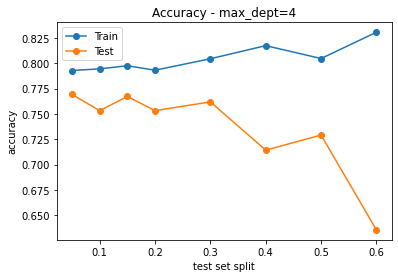

In [33]:
#decision tree classifer vs splits for max_depth=4
train_acc = []
test_acc = []
splits = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]
treenodes = []
treedepth = []

for i in range(len(splits)):
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=splits[i], random_state=1)
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', max_depth=4)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print("Split:", splits[i], " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:", train_acc[i], " Test set Accuracy:",test_acc[i])

   #printConfusion matrix
   print("     Confusion Matrix:", list(confusion_matrix(y_test,y_test_pred)/len(y_test)))

#plot results
pyplot.plot(splits, train_acc , '-o', label='Train')
pyplot.plot(splits, test_acc, '-o', label='Test')
pyplot.title('Accuracy - max_dept=4')
pyplot.ylabel('accuracy')
pyplot.xlabel('test set split')
pyplot.legend()
pyplot.show()

0 0.0  Depth: 16  Nodes: 221  Train set accuracy: 1.0  Test set Accuracy: 0.7402597402597403
     Confusion Matrix: [array([0.5       , 0.08441558]), array([0.17532468, 0.24025974])]
1 0.001  Depth: 16  Nodes: 217  Train set accuracy: 1.0  Test set Accuracy: 0.7532467532467533
     Confusion Matrix: [array([0.49350649, 0.09090909]), array([0.15584416, 0.25974026])]
2 0.002  Depth: 14  Nodes: 165  Train set accuracy: 0.9755700325732899  Test set Accuracy: 0.7597402597402597
     Confusion Matrix: [array([0.51298701, 0.07142857]), array([0.16883117, 0.24675325])]
3 0.003  Depth: 14  Nodes: 97  Train set accuracy: 0.9218241042345277  Test set Accuracy: 0.7857142857142857
     Confusion Matrix: [array([0.50649351, 0.07792208]), array([0.13636364, 0.27922078])]
4 0.004  Depth: 9  Nodes: 49  Train set accuracy: 0.8534201954397395  Test set Accuracy: 0.8181818181818182
     Confusion Matrix: [array([0.55194805, 0.03246753]), array([0.14935065, 0.26623377])]
5 0.005  Depth: 7  Nodes: 31  Train

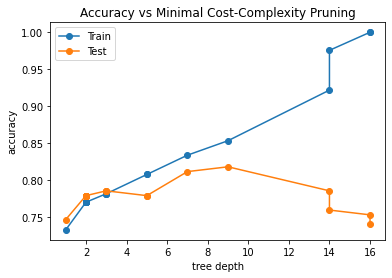

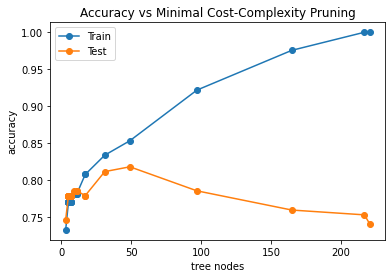

In [47]:
#decision tree classifer with Minimal Cost-Complexity Pruning 

train_acc = []
test_acc = []
treenodes = []
treedepth = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

for i in range(0,22):
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', ccp_alpha=i/1000)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print(i, i/1000, " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:",train_acc[i], " Test set Accuracy:",test_acc[i])

   #printConfusion matrix
   print("     Confusion Matrix:", list(confusion_matrix(y_test,y_test_pred)/len(y_test)))

#plot results vs tree depth
pyplot.plot(treedepth, train_acc , '-o', label='Train')
pyplot.plot(treedepth, test_acc, '-o', label='Test')
pyplot.title('Accuracy vs Minimal Cost-Complexity Pruning')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree depth')
pyplot.legend()
pyplot.show()

#plot results vs number of nodes
pyplot.plot(treenodes, train_acc , '-o', label='Train')
pyplot.plot(treenodes, test_acc, '-o', label='Test')
pyplot.title('Accuracy vs Minimal Cost-Complexity Pruning')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree nodes')
pyplot.legend()
pyplot.show()

1 ) Depth: 1  Nodes: 3  Train set accuracy: 0.739413680781759  Test set Accuracy: 0.7207792207792207
     Confusion Matrix: [array([0.51298701, 0.17532468]), array([0.1038961 , 0.20779221])]
2 ) Depth: 2  Nodes: 7  Train set accuracy: 0.7817589576547231  Test set Accuracy: 0.7272727272727273
     Confusion Matrix: [array([0.59090909, 0.0974026 ]), array([0.17532468, 0.13636364])]
3 ) Depth: 3  Nodes: 15  Train set accuracy: 0.7850162866449512  Test set Accuracy: 0.7012987012987013
     Confusion Matrix: [array([0.56493506, 0.12337662]), array([0.17532468, 0.13636364])]
4 ) Depth: 4  Nodes: 29  Train set accuracy: 0.7947882736156352  Test set Accuracy: 0.6428571428571429
     Confusion Matrix: [array([0.44155844, 0.24675325]), array([0.11038961, 0.2012987 ])]
5 ) Depth: 5  Nodes: 45  Train set accuracy: 0.8469055374592834  Test set Accuracy: 0.7142857142857143
     Confusion Matrix: [array([0.56493506, 0.12337662]), array([0.16233766, 0.14935065])]
6 ) Depth: 6  Nodes: 65  Train set acc

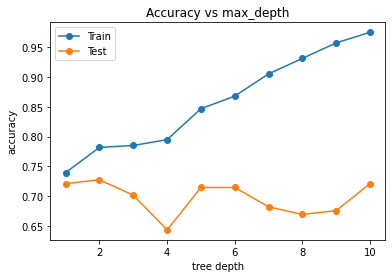

In [45]:
#decision tree classifer with max_depth
train_acc = []
test_acc = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)
max_depth_set = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in max_depth_set:
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', max_depth=i)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))

   #print tree attributes
   print(i, ") Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:",train_acc[i-1], " Test set Accuracy:",test_acc[i-1])

   #printConfusion matrix
   print("     Confusion Matrix:", list(confusion_matrix(y_test,y_test_pred)/len(y_test)))

#plot results vs tree depth
pyplot.plot(max_depth_set, train_acc , '-o', label='Train')
pyplot.plot(max_depth_set, test_acc, '-o', label='Test')
pyplot.title('Accuracy vs max_depth')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree depth')
pyplot.legend()
pyplot.show()

In [48]:
#Option to plot decision tree (currently doesn't work)
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

model_pick=6
features=x.columns
dot_data = StringIO()
export_graphviz(save_model[model_pick], out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


NameError: ignored